# Depth Profiles for OOI Pioneer NES AUV Across Shelf Deployments
* Taina Sanchez
* 2023-07-20
* Plotting netCDF data to create depth profiles by variable 
* Required input file(s): netcdf files provided through OOI’s JupyterHub 

In [1]:
#notebook setup
!pip install xarray
!pip install netCDF4 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# load in data file 
# this particular deployment in July 2019 starts on the shelf heads south offshore
# then east then returns north back over the shelf as displayed in OOI's Data Explorer
# https://dataexplorer.oceanobservatories.org/#platform/00f06d3c-4e1c-5d44-a130-fa44d7ff21ef/v2?pid=124&tab=visualization  
DATA_FILE = '/home/jovyan/ooi/uncabled/CP05MOAS-A6264/R00012/PROFILES/cp_6264-20190710T0900.nc'
dataset = xr.open_dataset(DATA_FILE)

/opt/conda/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
#display variable names from metadata
#dataset.variables

In [5]:
# Extract relevant data
# flatten values to create 1-dimensional array
time = dataset['time'].values[0].flatten()
depth = dataset['depth'].values[0].flatten()
nitrate = dataset['dissolved_nitrate'].values[0].flatten()
chlorophyll = dataset['chlorophyll_a'].values[0].flatten()
salinity = dataset['salinity'].values[0].flatten()

/opt/conda/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


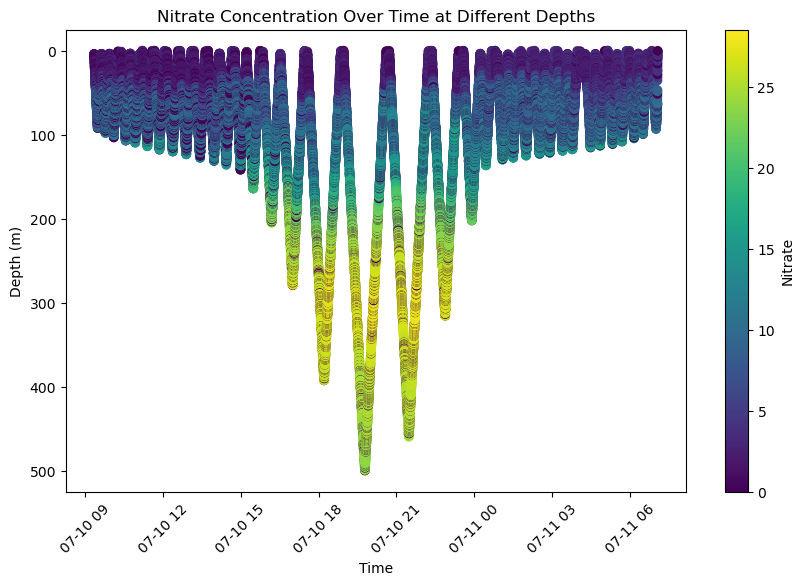

In [6]:
# Create scatter plot for a single plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(time, depth, c=nitrate, cmap='viridis')
plt.colorbar(sc, label='Nitrate')
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title('Nitrate Concentration Over Time at Different Depths')
plt.show()

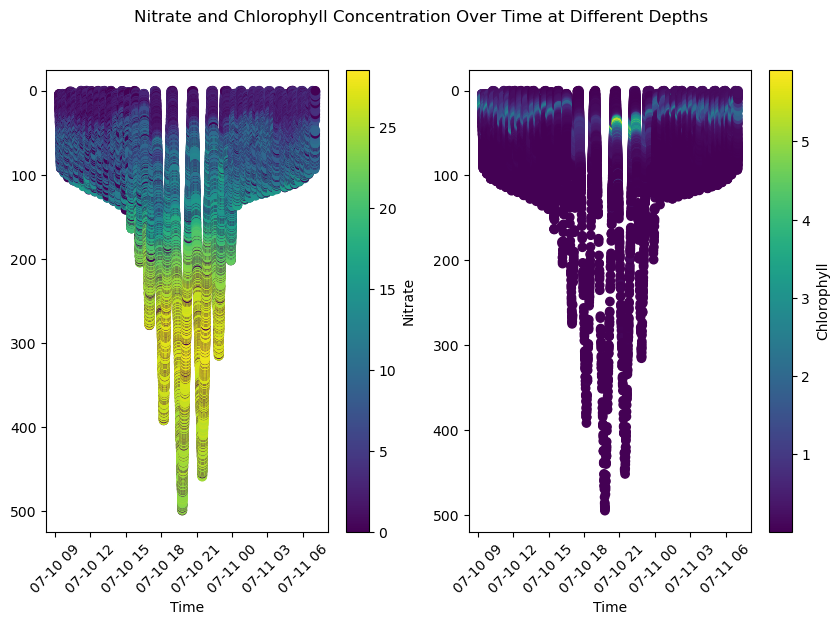

In [7]:
# Scatter plot for side-by-side plot 
plt.figure(figsize=(10, 6))

          
#nitrate plot
plt.subplot(1, 2, 1)
sc = plt.scatter(time, depth, c=nitrate, cmap='viridis')
plt.colorbar(sc, label='Nitrate')
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

#chlorophyll plot
plt.subplot(1, 2, 2)
sc = plt.scatter(time, depth, c=chlorophyll, cmap='viridis')
plt.colorbar(sc, label='Chlorophyll')
plt.gca().invert_yaxis()  # Invert y-axis because depth increases downwards
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.suptitle('Nitrate and Chlorophyll Concentration Over Time at Different Depths')
plt.show()